In [4]:
import numpy
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
# from sklearn.cluster import sil
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


# %matplotlib inline
df=pd.read_excel('./合并表格.xlsx')

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

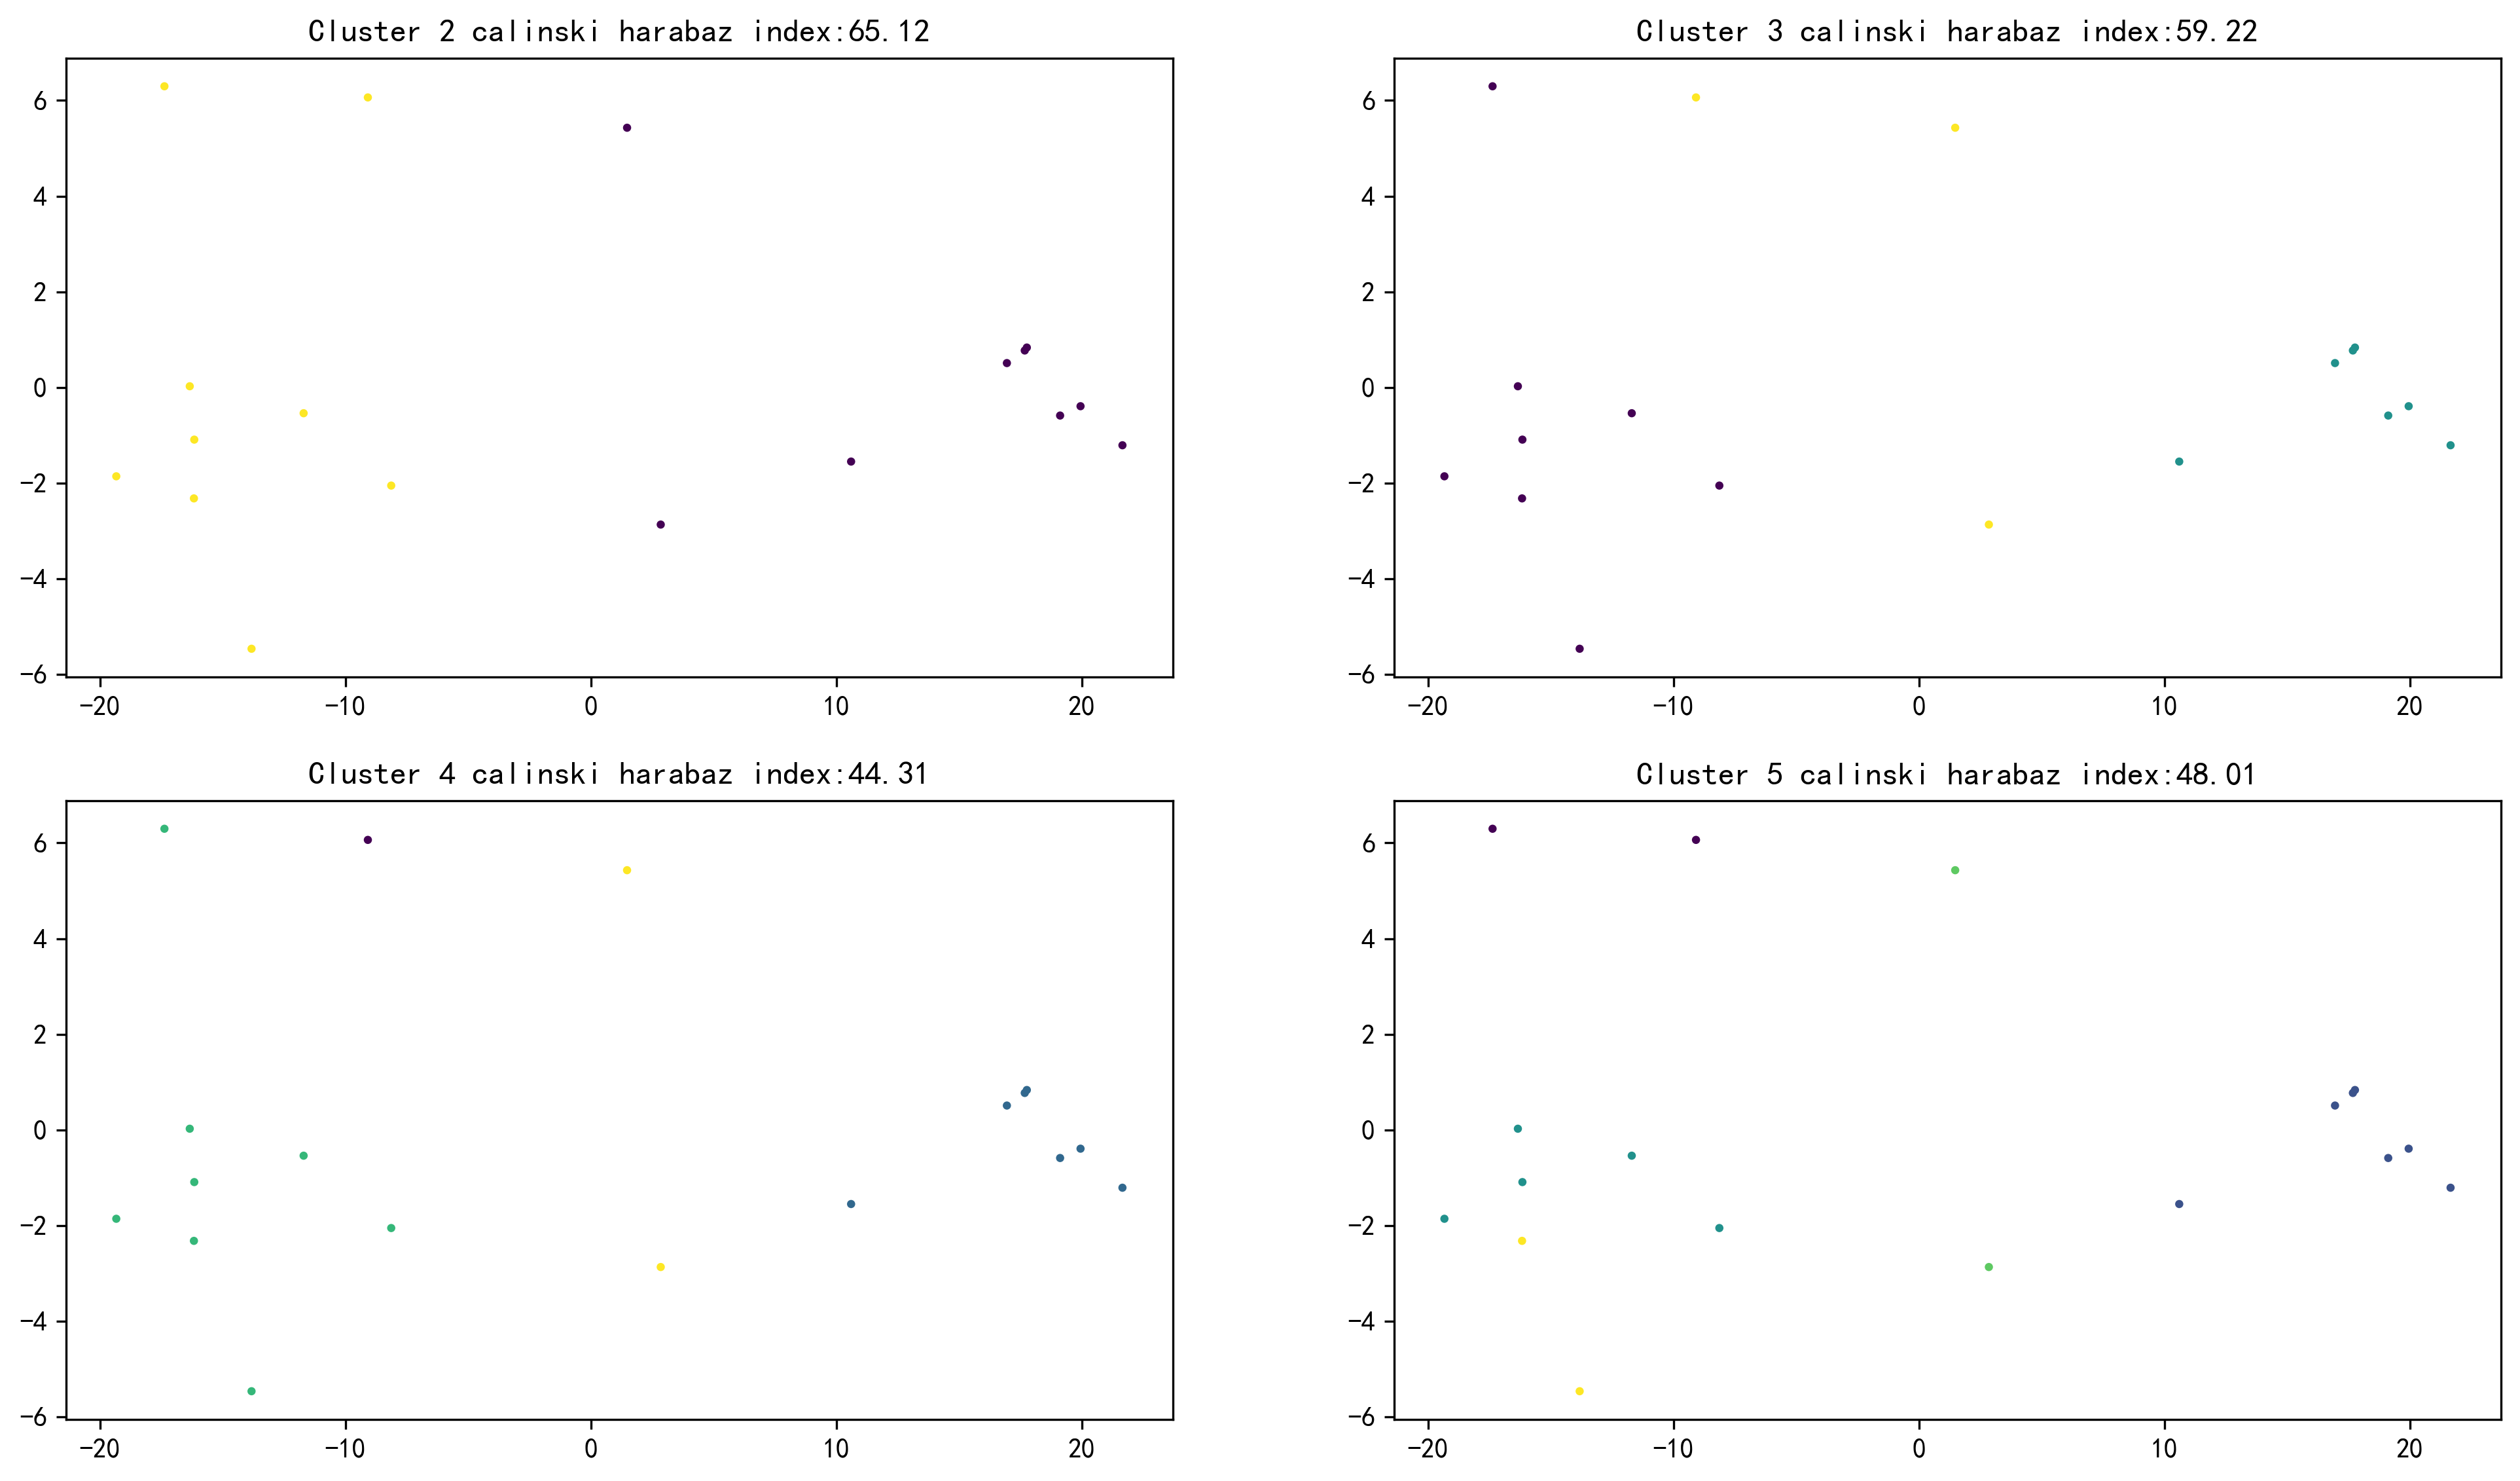

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
data_hk=df[df["Types"]=="High potassium"]
data_hk=data_hk.iloc[:,1:15]

from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
calinski_harabaz_list=[]
fig = plt.figure(figsize=(16,9), dpi=300)
for i in range(2,6):
    #构建,并训练,模型
    kmeans = MiniBatchKMeans(n_clusters = i,random_state=213).fit(data_hk)
    # ce=kmeans.cluster_centers_.round(4) # 聚类中心
    y_pred = MiniBatchKMeans(n_clusters = i,random_state=231).fit_predict(data_hk)
    score = calinski_harabasz_score(data_hk,kmeans.labels_)
    calinski_harabaz_list.append(score)
    pca =PCA(n_components=2) #PCA算法，将降维后主成分的数目为两
    reduced_X =pca.fit_transform(data_hk)
    tim=int('22{}'.format(i))-1
    plt.subplot(tim)
    plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y_pred,s=4)
    plt.title("Cluster {} calinski harabaz index:{}".format(i,round(score,2)))


plt.show()
kmeans = MiniBatchKMeans(n_clusters = 2,random_state=213).fit(data_hk)
ce=kmeans.cluster_centers_.round(4) # 聚类中心
y_pred = MiniBatchKMeans(n_clusters = 2,random_state=231).fit_predict(data_hk)

data_hk.loc[:,"分类"]=y_pred
data_hk.to_excel("高钾_聚类.xlsx",index=False)

In [6]:
# plt.plot([2,3,4,5],calinski_harabaz_list)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to '

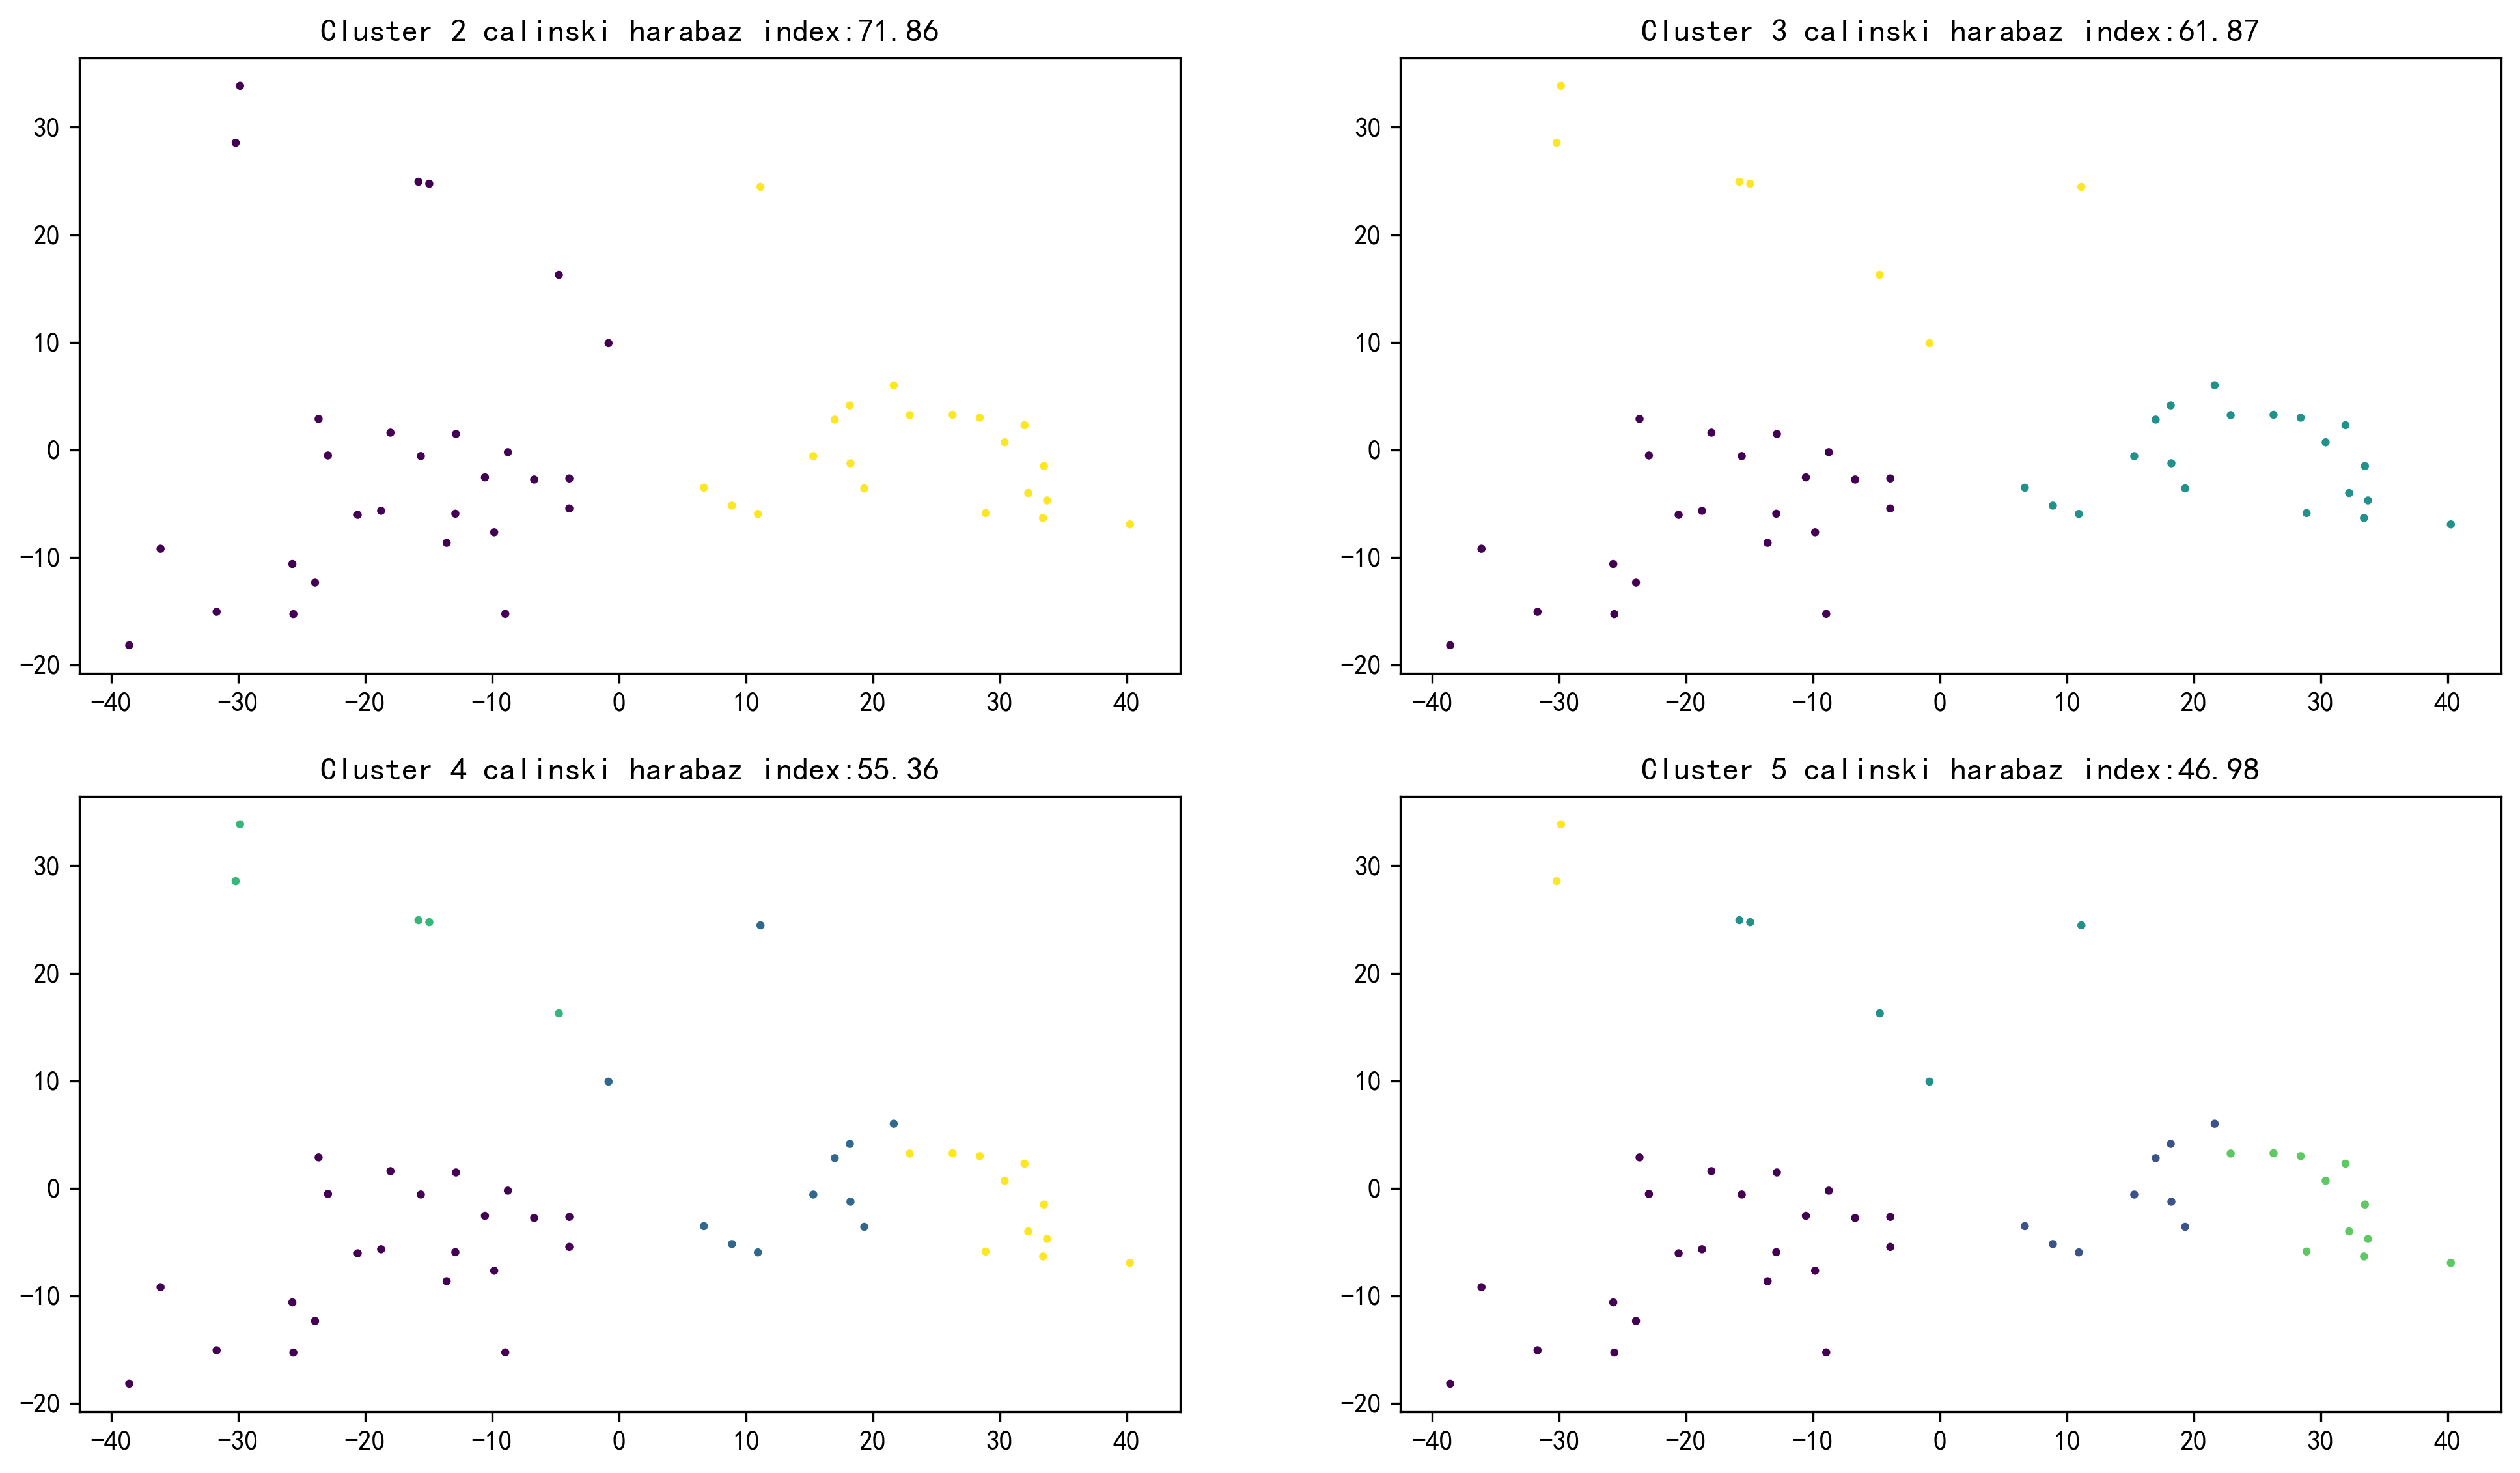

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
data_pb=df[df["Types"]=="Lead and barium"]
data_pb=data_pb.iloc[:,1:15]

from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
calinski_harabaz_list=[]
fig = plt.figure(figsize=(16,9), dpi=300)
for i in range(2,6):
    #构建,并训练,模型
    kmeans = MiniBatchKMeans(n_clusters = i,random_state=213).fit(data_pb)
    # print(kmeans.cluster_centers_) # 聚类中心
    y_pred = MiniBatchKMeans(n_clusters = i,random_state=231).fit_predict(data_pb)
    score = calinski_harabasz_score(data_pb,kmeans.labels_)
    calinski_harabaz_list.append(score)
    pca =PCA(n_components=2) #PCA算法，将降维后主成分的数目为两
    reduced_X =pca.fit_transform(data_pb)
    tim=int('22{}'.format(i))-1
    plt.subplot(tim)
    plt.scatter(reduced_X[:,0],reduced_X[:,1],c=y_pred,s=4)
    plt.title("Cluster {} calinski harabaz index:{}".format(i,round(score,2)))


plt.show()
kmeans = MiniBatchKMeans(n_clusters = 2,random_state=0).fit(data_pb)
ce_pb=kmeans.cluster_centers_.round(4) # 聚类中心
y_pred = MiniBatchKMeans(n_clusters = 2,random_state=0).fit_predict(data_pb)
data_pb.loc[:,"分类"]=y_pred
data_pb.to_excel("铅钡_聚类.xlsx",index=False)

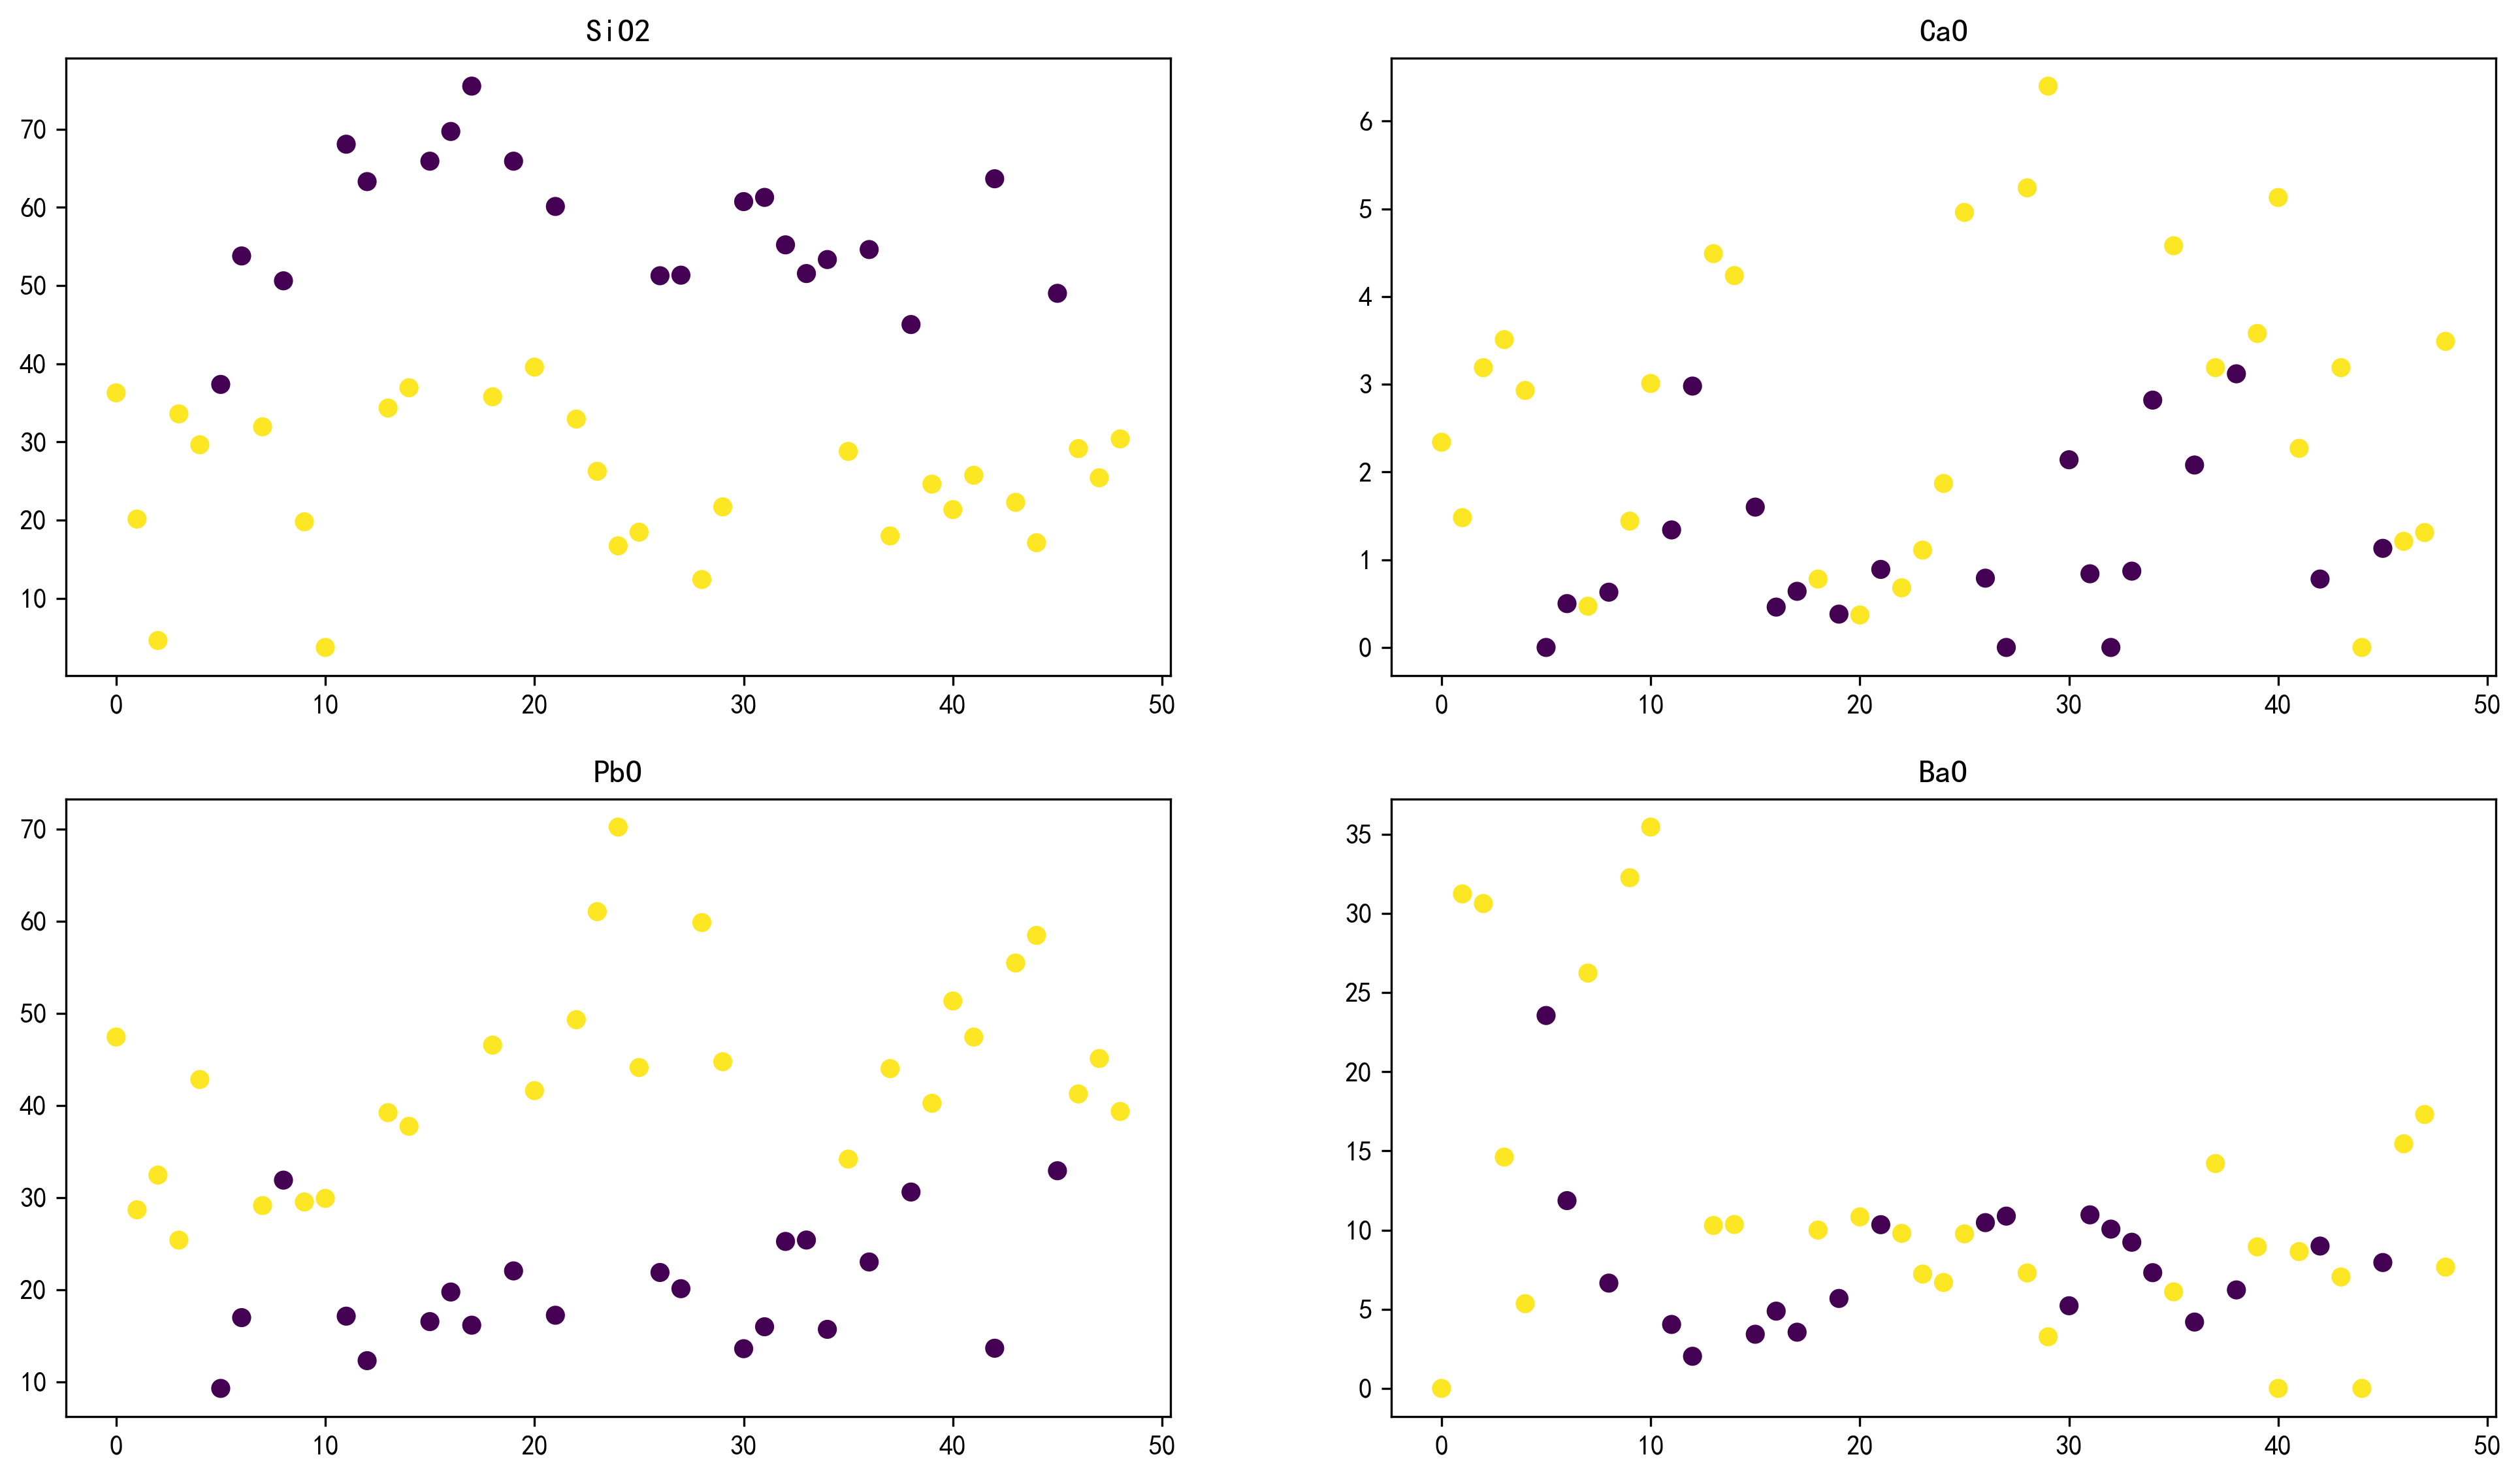

In [9]:
# fig = plt.figure(figsize=(16,9), dpi=300)
# for i in range(14):
    
#     print(data_pb.columns[i])
#     plt.subplot(3,5,i+1)
#     plt.scatter(range(len(data_pb)),data_pb["{}".format(data_pb.columns[i])],c=y_pred)
#     plt.title(data_pb.columns[i])
#     # data_pb.head()
# plt.show()
fig = plt.figure(figsize=(16,9), dpi=300)
plt.subplot(2,2,1)
plt.scatter(range(len(data_pb)),data_pb["SiO2"],c=data_pb.loc[:,"分类"])
plt.title("SiO2")

plt.subplot(2,2,2)
plt.scatter(range(len(data_pb)),data_pb["CaO"],c=data_pb.loc[:,"分类"])
plt.title("CaO")

plt.subplot(2,2,3)
plt.scatter(range(len(data_pb)),data_pb["PbO"],c=data_pb.loc[:,"分类"])
plt.title("PbO")

plt.subplot(2,2,4)
plt.scatter(range(len(data_pb)),data_pb["BaO"],c=data_pb.loc[:,"分类"])
plt.title("BaO")


plt.show()

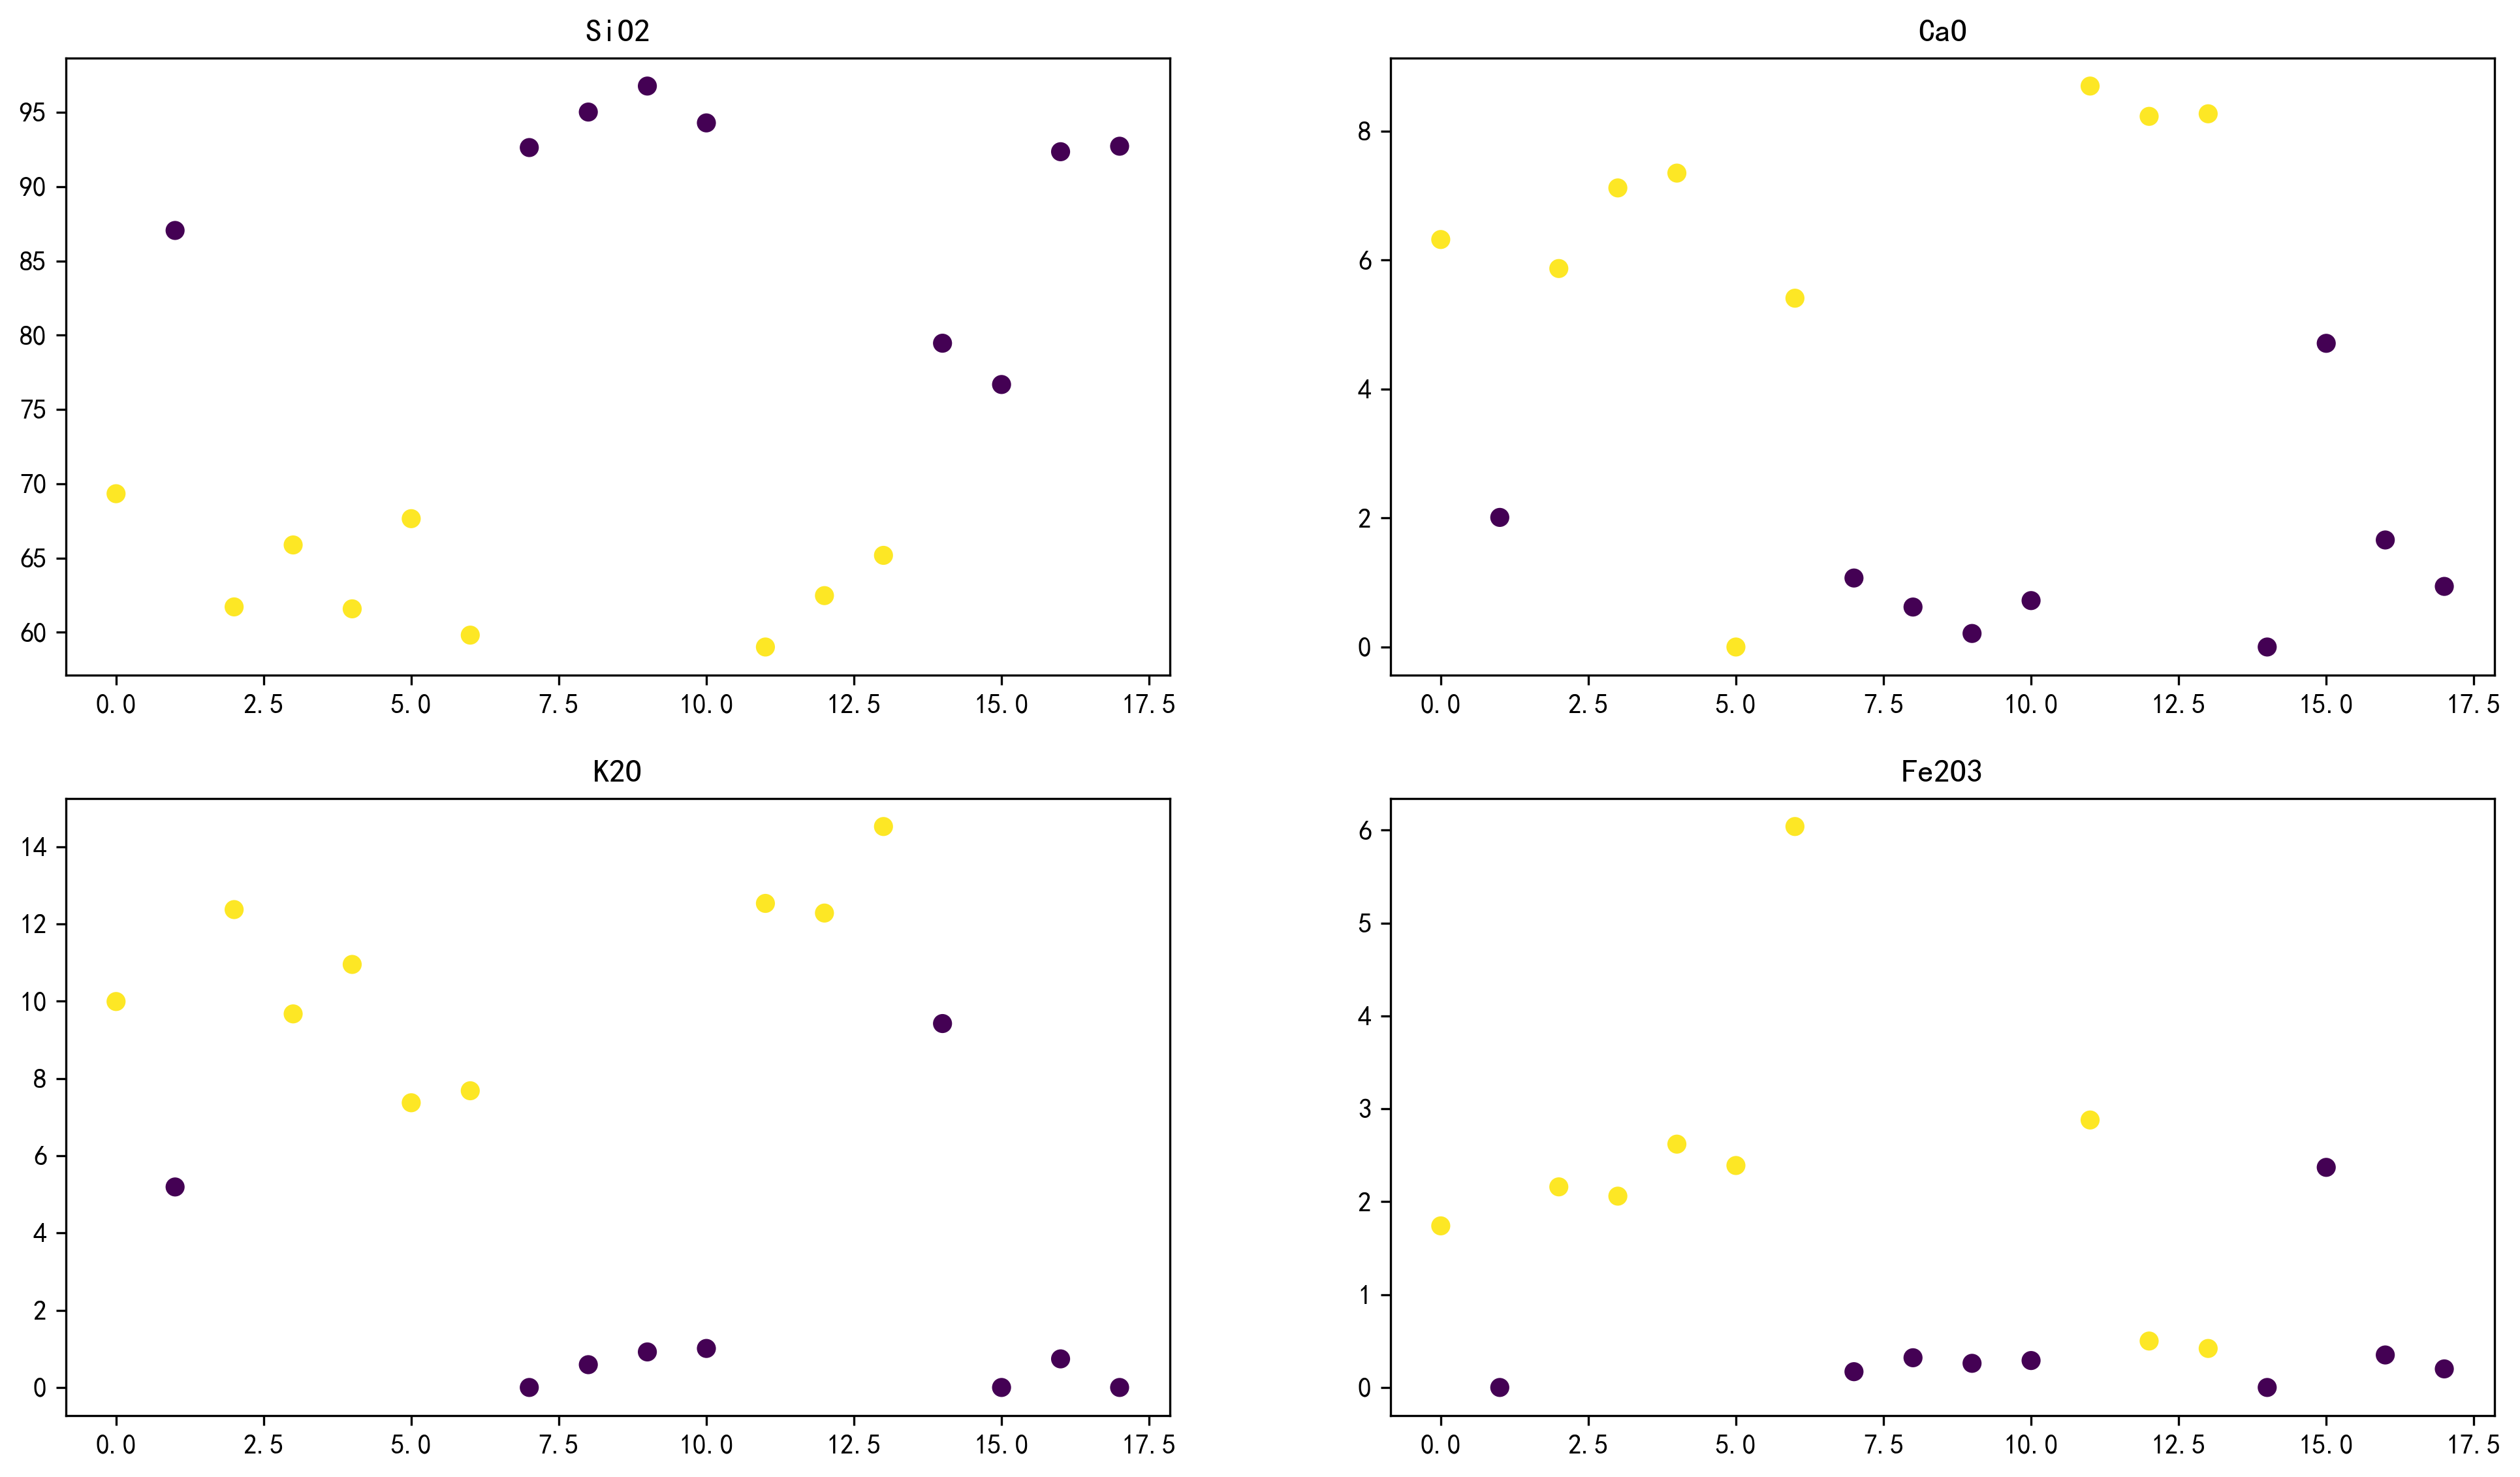

In [10]:
fig = plt.figure(figsize=(16,9), dpi=300)
plt.subplot(2,2,1)
plt.scatter(range(len(data_hk)),data_hk["SiO2"],c=data_hk.loc[:,"分类"])
plt.title("SiO2")

plt.subplot(2,2,2)
plt.scatter(range(len(data_hk)),data_hk["CaO"],c=data_hk.loc[:,"分类"])
plt.title("CaO")

plt.subplot(2,2,3)
plt.scatter(range(len(data_hk)),data_hk["K2O"],c=data_hk.loc[:,"分类"])
plt.title("K2O")

plt.subplot(2,2,4)
plt.scatter(range(len(data_hk)),data_hk["Fe2O3"],c=data_hk.loc[:,"分类"])
plt.title("Fe2O3")


plt.show()


# fig = plt.figure(figsize=(16,9), dpi=300)
# for i in range(14):
    
#     print(data_hk.columns[i])
#     plt.subplot(3,5,i+1)
#     plt.scatter(range(len(data_hk)),data_hk["{}".format(data_hk.columns[i])],c=data_hk.loc[:,"分类"])
#     plt.title(data_hk.columns[i])

# plt.show()

